# Trabalho de Previsão de Churn em Telecom

## Importações de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')


## Visão Geral dos Dados

In [60]:
df = pd.read_csv('telecom_users.csv')

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.shape

(5986, 22)

In [5]:
df['Unnamed: 0'].nunique()

5986

In [6]:
df['customerID'].nunique()

5986

Como não existem clientes repetidos, foi decidido excluir a coluna 'Unnamed: 0', pois funciona como um 'customerID' também.

In [61]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [6]:
df.shape

(5986, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


Analisando os dados, percebe-se que a coluna 'TotalCharges' não é do tipo float, e, portanto, podem existir dados vazios, como uma string em branco.

Portanto, iremos primeiro transformar esses dados no tipo float.

In [62]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [8]:
pd.isna(df).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [8]:
df.loc[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


Foram encontrados 10 dados com dados ausentes. Foi-se decidido a exclusão dessas 10 linhas.

In [63]:
df.drop(labels=df.loc[df.TotalCharges.isnull()].index, axis=0, inplace=True)

In [10]:
df.shape

(5976, 21)

In [64]:
pd.isna(df).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000,5976.000000
mean,0.161647,32.523092,64.846687,2298.060617
std,0.368157,24.500858,30.107576,2274.127165
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,404.312500
50%,0.000000,29.000000,70.425000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


## Análise Exploratória dos Dados

In [67]:
churn = df[df['Churn']=='Yes']
nao_churn = df[df['Churn']=='No']

### Contract

<AxesSubplot:xlabel='Contract', ylabel='count'>

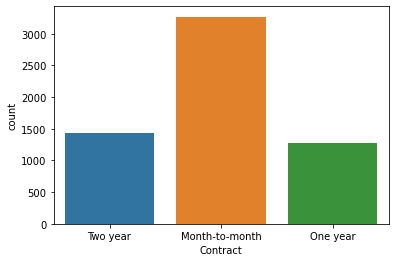

In [15]:
sns.countplot(x='Contract', data=df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

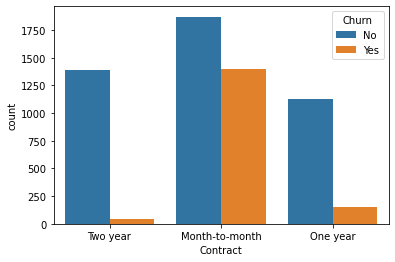

In [16]:
sns.countplot(x='Contract', data=df, hue='Churn')

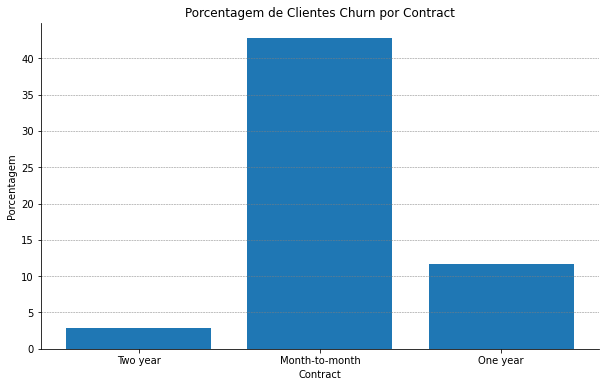

In [61]:
y = [len(churn[churn['Contract']=='Two year'])/(len(df[df['Contract']=='Two year']))*100, len(churn[churn['Contract']=='Month-to-month'])/(len(df[df['Contract']=='Month-to-month']))*100, len(churn[churn['Contract']=='One year'])/(len(df[df['Contract']=='One year']))*100]
x = ['Two year', 'Month-to-month', 'One year']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por Contract", xlabel = "Contract")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### PaymentMethod

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

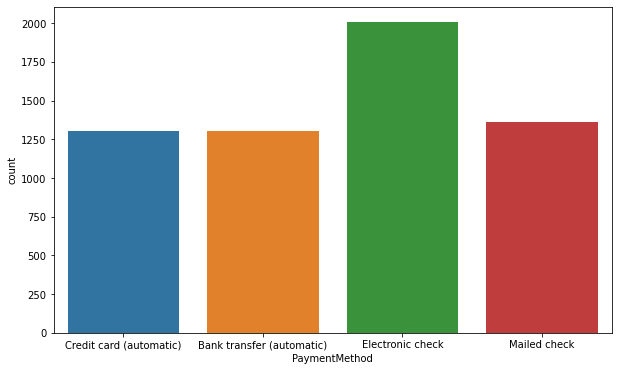

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

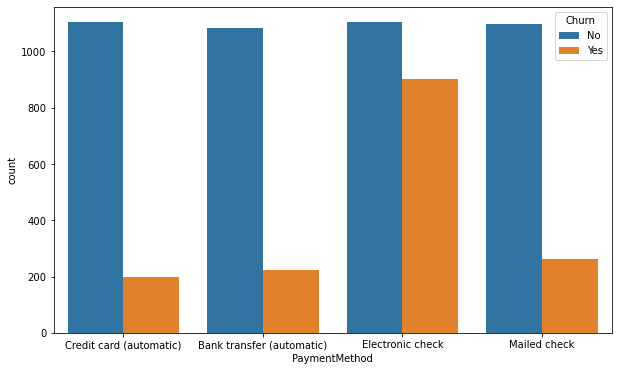

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', data=df, hue='Churn')

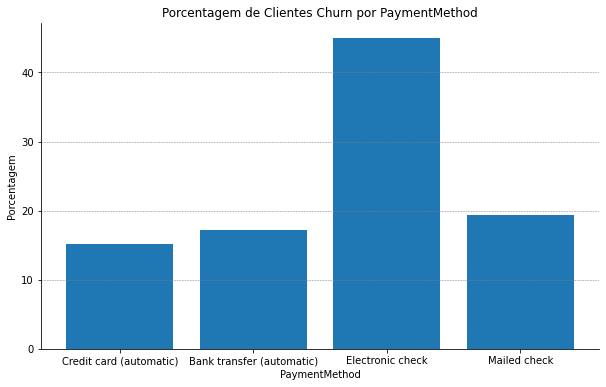

In [70]:
y = [len(churn[churn['PaymentMethod']=='Credit card (automatic)'])/(len(df[df['PaymentMethod']=='Credit card (automatic)']))*100, len(churn[churn['PaymentMethod']=='Bank transfer (automatic)'])/(len(df[df['PaymentMethod']=='Bank transfer (automatic)']))*100, len(churn[churn['PaymentMethod']=='Electronic check'])/(len(df[df['PaymentMethod']=='Electronic check']))*100, len(churn[churn['PaymentMethod']=='Mailed check'])/(len(df[df['PaymentMethod']=='Mailed check']))*100]
x = ['Credit card (automatic)', 'Bank transfer (automatic)', 'Electronic check', 'Mailed check']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por PaymentMethod", xlabel = "PaymentMethod")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### InternetService

<AxesSubplot:xlabel='InternetService', ylabel='count'>

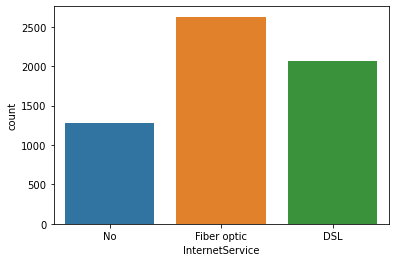

In [18]:
sns.countplot(x='InternetService', data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

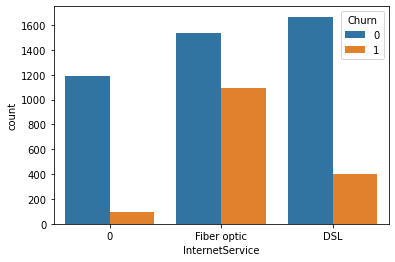

In [83]:
sns.countplot(x='InternetService', data=df, hue='Churn')

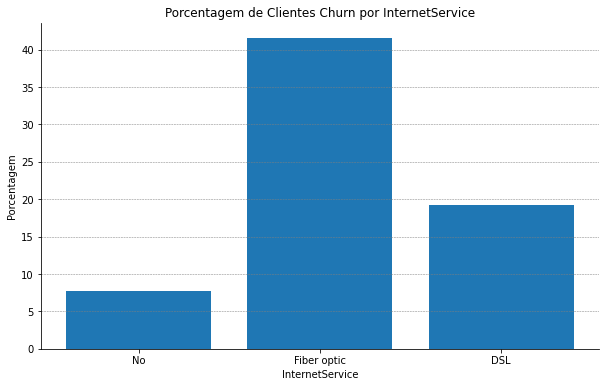

In [54]:
y = [len(churn[churn['InternetService']=='No'])/(len(df[df['InternetService']=='No']))*100, len(churn[churn['InternetService']=='Fiber optic'])/(len(df[df['InternetService']=='Fiber optic']))*100, len(churn[churn['InternetService']=='DSL'])/(len(df[df['InternetService']=='DSL']))*100]
x = ['No', 'Fiber optic', 'DSL']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por InternetService", xlabel = "InternetService")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### Partner

<AxesSubplot:xlabel='Partner', ylabel='count'>

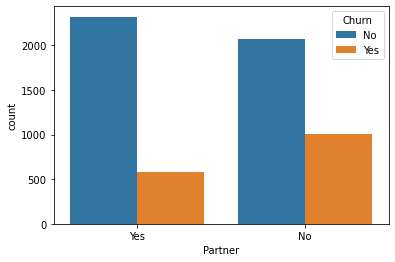

In [8]:
sns.countplot(data=df, x='Partner', hue='Churn')

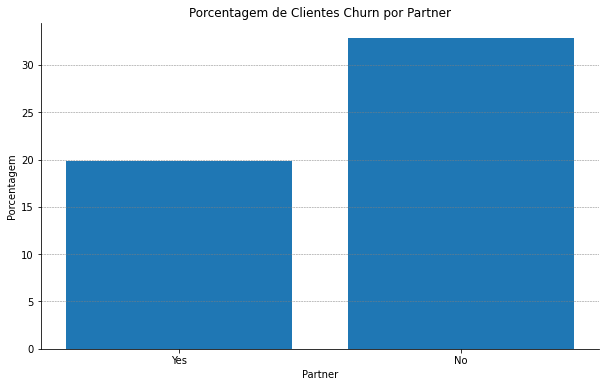

In [74]:
y = [len(churn[churn['Partner']=='Yes'])/(len(df[df['Partner']=='Yes']))*100, len(churn[churn['Partner']=='No'])/(len(df[df['Partner']=='No']))*100]
x = ['Yes', 'No']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por Partner", xlabel = "Partner")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### SeniorCitizen

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

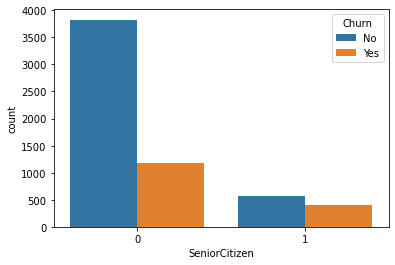

In [20]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')

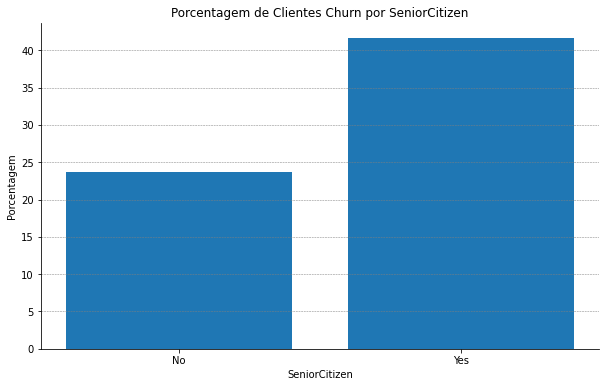

In [75]:
y = [len(churn[churn['SeniorCitizen']==0])/(len(df[df['SeniorCitizen']==0]))*100, len(churn[churn['SeniorCitizen']==1])/(len(df[df['SeniorCitizen']==1]))*100]
x = ['No', 'Yes']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por SeniorCitizen", xlabel = "SeniorCitizen")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### Dependents

<AxesSubplot:xlabel='Dependents', ylabel='count'>

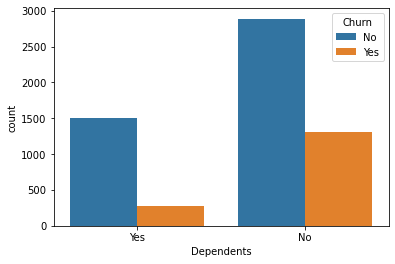

In [21]:
sns.countplot(data=df, x='Dependents', hue='Churn')

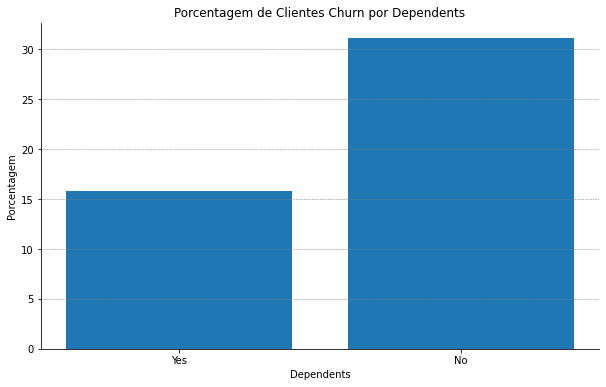

In [77]:
y = [len(churn[churn['Dependents']=='Yes'])/(len(df[df['Dependents']=='Yes']))*100, len(churn[churn['Dependents']=='No'])/(len(df[df['Dependents']=='No']))*100]
x = ['Yes', 'No']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por Dependents", xlabel = "Dependents")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### PhoneService

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

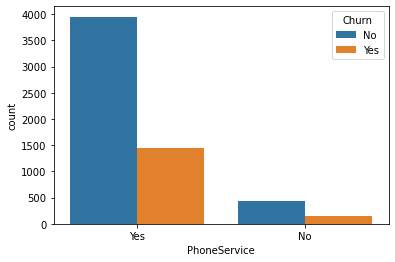

In [22]:
sns.countplot(data=df, x='PhoneService', hue='Churn')

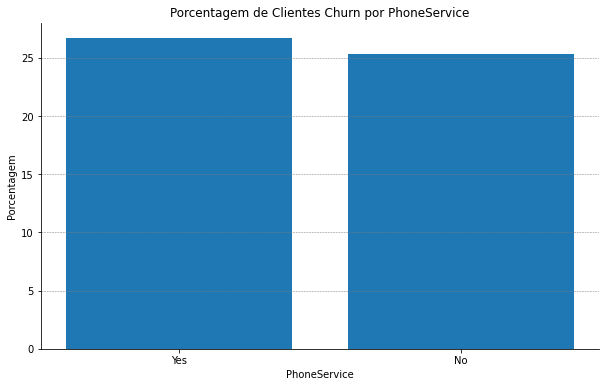

In [79]:
y = [len(churn[churn['PhoneService']=='Yes'])/(len(df[df['PhoneService']=='Yes']))*100, len(churn[churn['PhoneService']=='No'])/(len(df[df['PhoneService']=='No']))*100]
x = ['Yes', 'No']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por PhoneService", xlabel = "PhoneService")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### MultipleLines

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

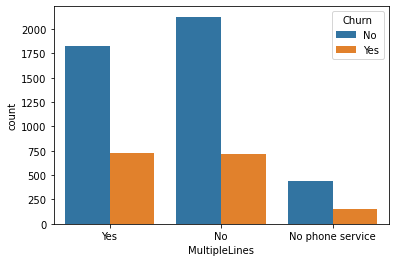

In [23]:
sns.countplot(data=df, x='MultipleLines', hue='Churn')

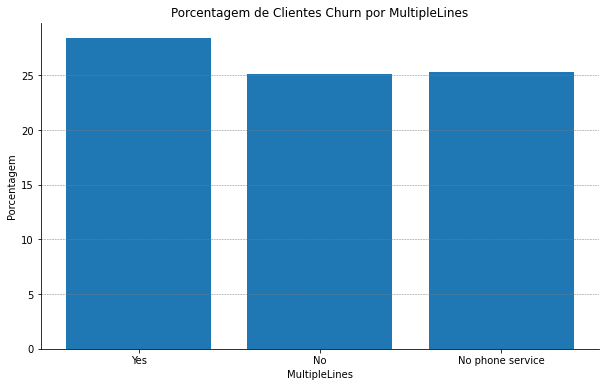

In [81]:
y = [len(churn[churn['MultipleLines']=='Yes'])/(len(df[df['MultipleLines']=='Yes']))*100, len(churn[churn['MultipleLines']=='No'])/(len(df[df['MultipleLines']=='No']))*100, len(churn[churn['MultipleLines']=='No phone service'])/(len(df[df['MultipleLines']=='No phone service']))*100]
x = ['Yes', 'No', 'No phone service']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por MultipleLines", xlabel = "MultipleLines")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### OnlineSecurity

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

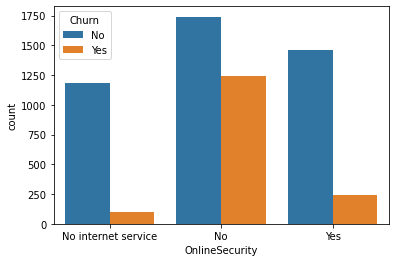

In [25]:
sns.countplot(data=df, x='OnlineSecurity', hue='Churn')

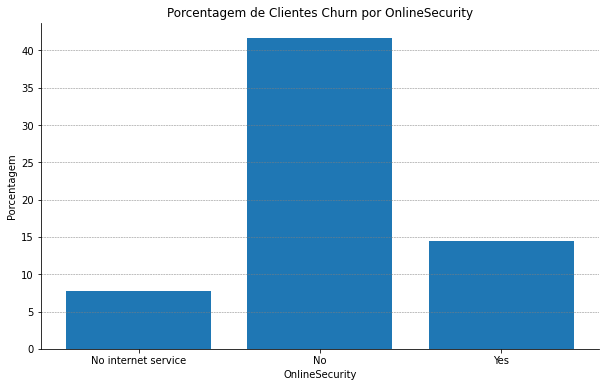

In [85]:
y = [len(churn[churn['OnlineSecurity']=='No internet service'])/(len(df[df['OnlineSecurity']=='No internet service']))*100, len(churn[churn['OnlineSecurity']=='No'])/(len(df[df['OnlineSecurity']=='No']))*100, len(churn[churn['OnlineSecurity']=='Yes'])/(len(df[df['OnlineSecurity']=='Yes']))*100]
x = ['No internet service', 'No', 'Yes']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por OnlineSecurity", xlabel = "OnlineSecurity")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### OnlineBackup

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

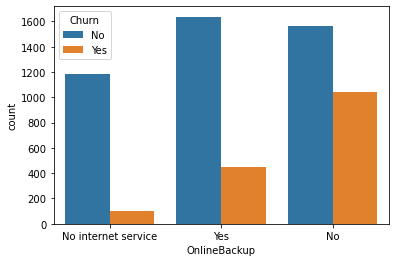

In [26]:
sns.countplot(data=df, x='OnlineBackup', hue='Churn')

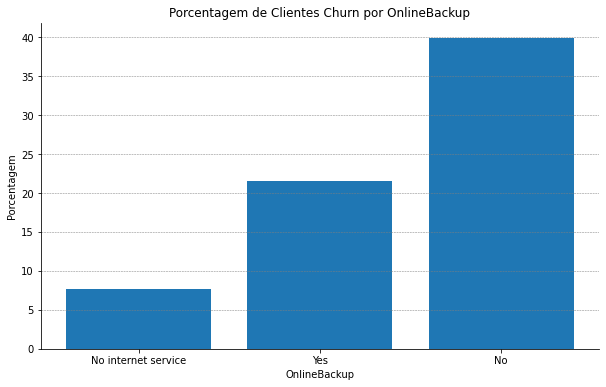

In [86]:
y = [len(churn[churn['OnlineBackup']=='No internet service'])/(len(df[df['OnlineBackup']=='No internet service']))*100, len(churn[churn['OnlineBackup']=='Yes'])/(len(df[df['OnlineBackup']=='Yes']))*100, len(churn[churn['OnlineBackup']=='No'])/(len(df[df['OnlineBackup']=='No']))*100]
x = ['No internet service', 'Yes', 'No']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por OnlineBackup", xlabel = "OnlineBackup")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### DeviceProtection

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

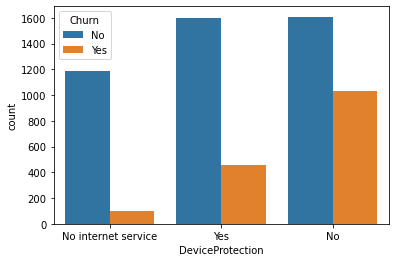

In [27]:
sns.countplot(data=df, x='DeviceProtection', hue='Churn')

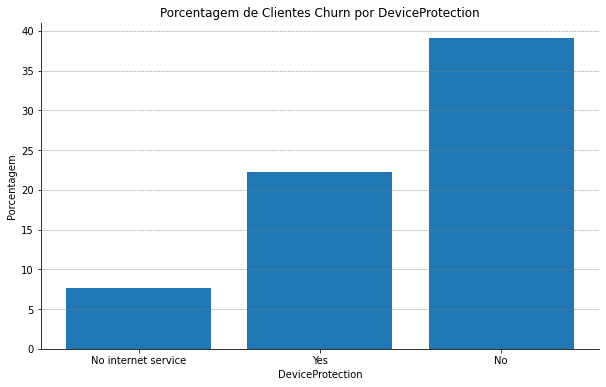

In [88]:
y = [len(churn[churn['DeviceProtection']=='No internet service'])/(len(df[df['DeviceProtection']=='No internet service']))*100, len(churn[churn['DeviceProtection']=='Yes'])/(len(df[df['DeviceProtection']=='Yes']))*100, len(churn[churn['DeviceProtection']=='No'])/(len(df[df['DeviceProtection']=='No']))*100]
x = ['No internet service', 'Yes', 'No']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por DeviceProtection", xlabel = "DeviceProtection")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### TechSupport

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

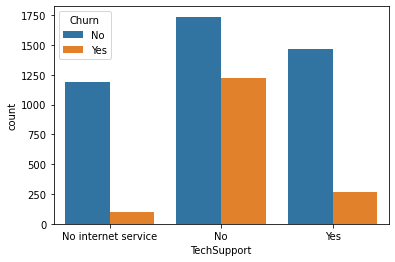

In [28]:
sns.countplot(data=df, x='TechSupport', hue='Churn')

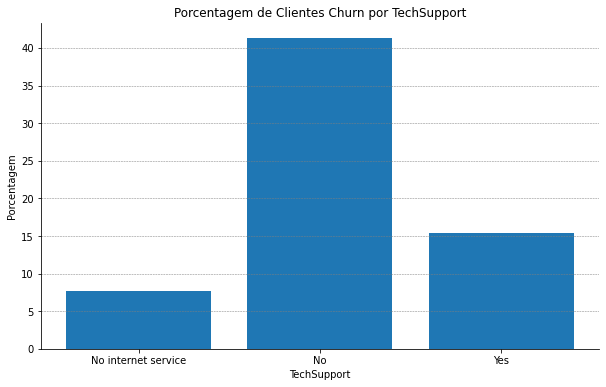

In [94]:
y = [len(churn[churn['TechSupport']=='No internet service'])/(len(df[df['TechSupport']=='No internet service']))*100, len(churn[churn['TechSupport']=='No'])/(len(df[df['TechSupport']=='No']))*100, len(churn[churn['TechSupport']=='Yes'])/(len(df[df['TechSupport']=='Yes']))*100]
x = ['No internet service', 'No', 'Yes']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por TechSupport", xlabel = "TechSupport")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### StreamingTV

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

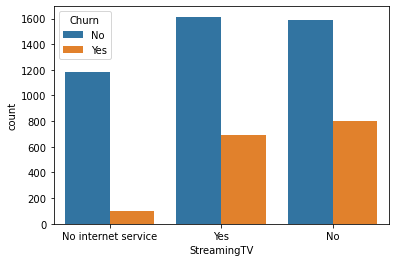

In [29]:
sns.countplot(data=df, x='StreamingTV', hue='Churn')

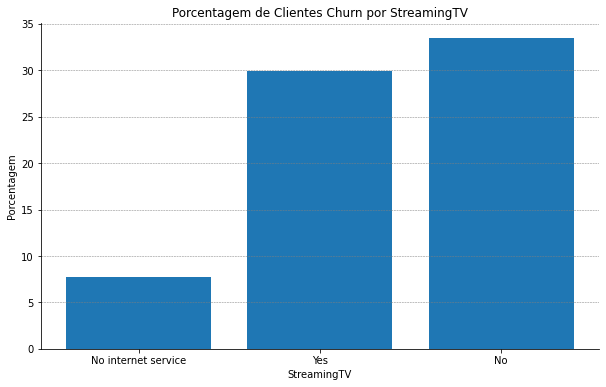

In [95]:
y = [len(churn[churn['StreamingTV']=='No internet service'])/(len(df[df['StreamingTV']=='No internet service']))*100, len(churn[churn['StreamingTV']=='Yes'])/(len(df[df['StreamingTV']=='Yes']))*100, len(churn[churn['StreamingTV']=='No'])/(len(df[df['StreamingTV']=='No']))*100]
x = ['No internet service', 'Yes', 'No']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por StreamingTV", xlabel = "StreamingTV")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### StreamingMovies

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

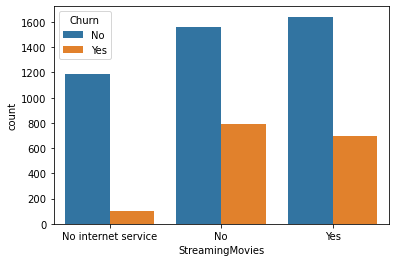

In [30]:
sns.countplot(data=df, x='StreamingMovies', hue='Churn')

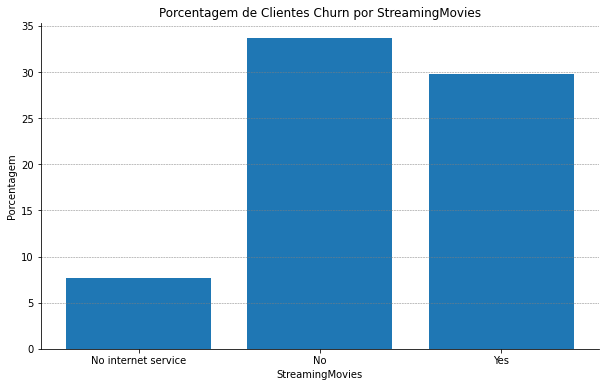

In [97]:
y = [len(churn[churn['StreamingMovies']=='No internet service'])/(len(df[df['StreamingMovies']=='No internet service']))*100, len(churn[churn['StreamingMovies']=='No'])/(len(df[df['StreamingMovies']=='No']))*100, len(churn[churn['StreamingMovies']=='Yes'])/(len(df[df['StreamingMovies']=='Yes']))*100]
x = ['No internet service', 'No', 'Yes']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por StreamingMovies", xlabel = "StreamingMovies")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### PaperlessBilling

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

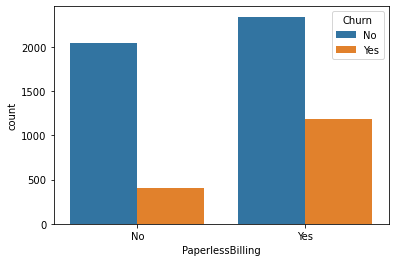

In [154]:
sns.countplot(data=df, x='PaperlessBilling', hue='Churn')

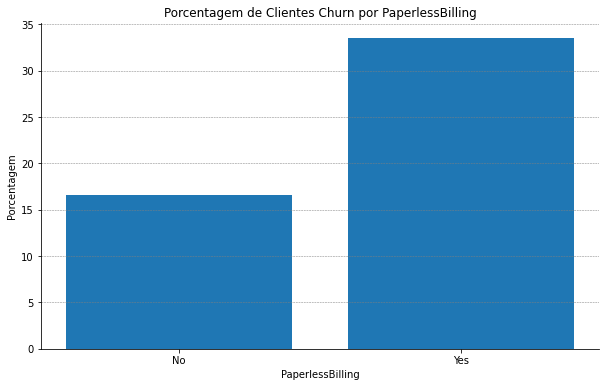

In [156]:
y = [len(churn[churn['PaperlessBilling']=='No'])/(len(df[df['PaperlessBilling']=='No']))*100, len(churn[churn['PaperlessBilling']=='Yes'])/(len(df[df['PaperlessBilling']=='Yes']))*100]
x = ['No', 'Yes']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por PaperlessBilling", xlabel = "PaperlessBilling")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### Tenure

<AxesSubplot:xlabel='tenure', ylabel='count'>

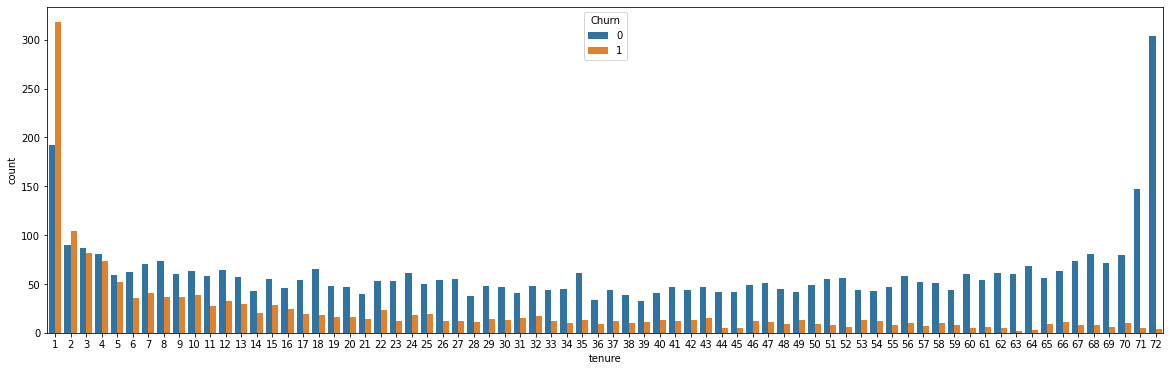

In [55]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='tenure', hue='Churn')

In [68]:
porcentagem = []
for i in range(1, 73):
    try:
        resultado = len(churn[churn['tenure']==i])/(len(df[df['tenure']==i]))*100
        porcentagem.append(resultado)
    except ZeroDivisionError:
        porcentagem.append(0)

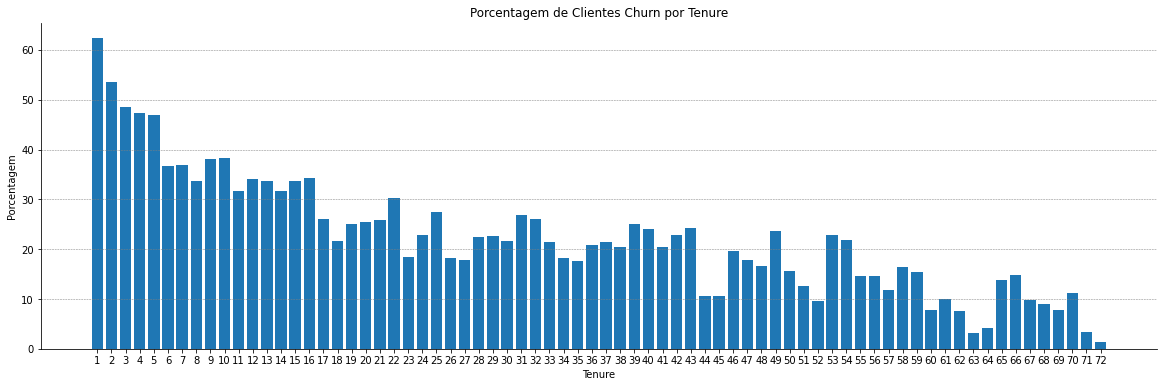

In [69]:
y = porcentagem
x = [x for x in range(1, 73)]

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por Tenure", xlabel = "Tenure")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

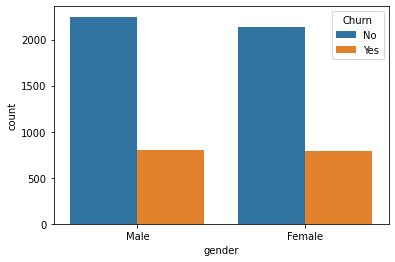

In [32]:
sns.countplot(data=df, x='gender', hue='Churn')

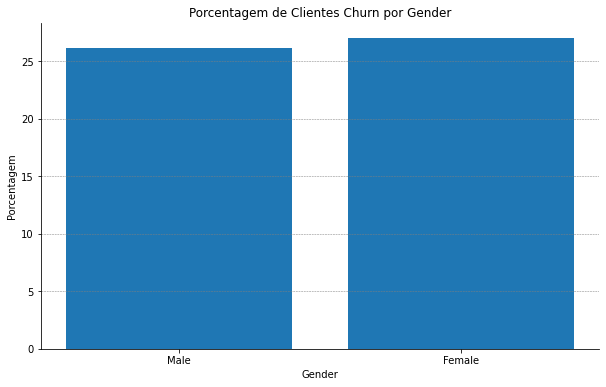

In [114]:
y = [len(churn[churn['gender']=='Male'])/(len(df[df['gender']=='Male']))*100, len(churn[churn['gender']=='Female'])/(len(df[df['gender']=='Female']))*100]
x = ['Male', 'Female']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, tick_label = x)

ax.set(title = "Porcentagem de Clientes Churn por Gender", xlabel = "Gender")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Porcentagem')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

### MonthlyCharges

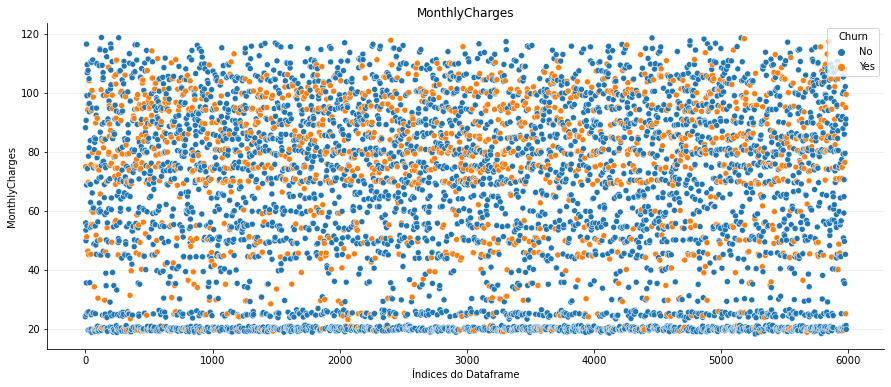

In [176]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df.index, y=df['MonthlyCharges'], data=df, hue='Churn').set_title('MonthlyCharges')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlabel('Índices do Dataframe')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.3)

<AxesSubplot:ylabel='MonthlyCharges'>

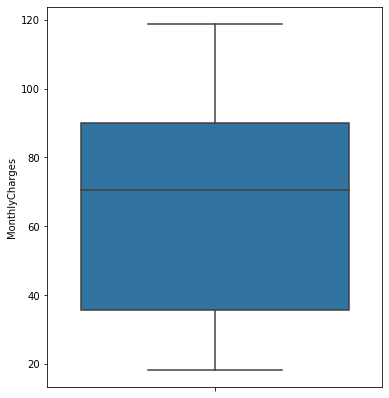

In [177]:
plt.figure(figsize=(6,7))
sns.boxplot(y=df['MonthlyCharges'], data=df)

Text(0.5, 0, 'Churn')

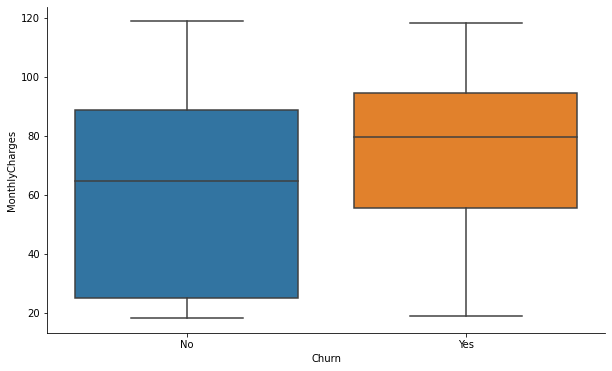

In [178]:
plt.figure(figsize=(10,6))
sns.boxplot(y='MonthlyCharges', x='Churn', data=df)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.ylabel('MonthlyCharges')
plt.xlabel('Churn')

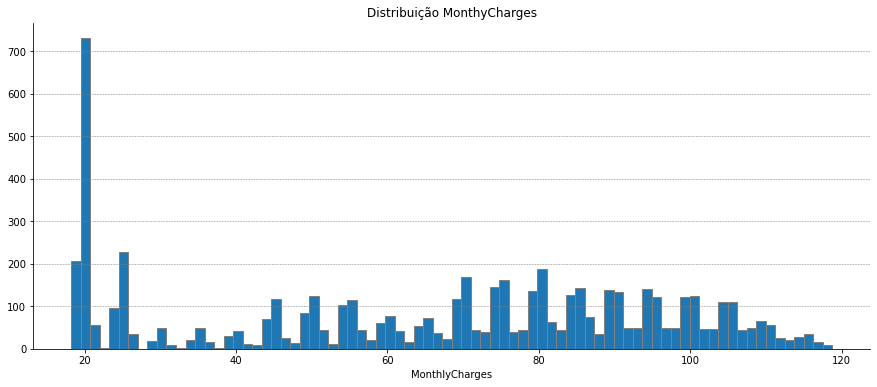

In [180]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.hist(x=df['MonthlyCharges'], bins=80, ec='grey')

ax.set(title = "Distribuição MonthyCharges", xlabel = "MonthlyCharges")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

<AxesSubplot:title={'center':'Violin Plot do MonthlyCharges'}, xlabel='MonthlyCharges', ylabel='MonthlyCharges'>

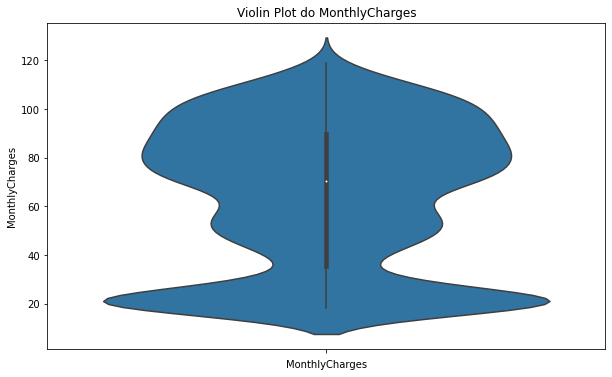

In [179]:
plt.figure(figsize=(10, 6))
plt.title('Violin Plot do MonthlyCharges')
plt.xlabel('MonthlyCharges')
sns.violinplot(y=df['MonthlyCharges'], data=df)

### TotalCharges

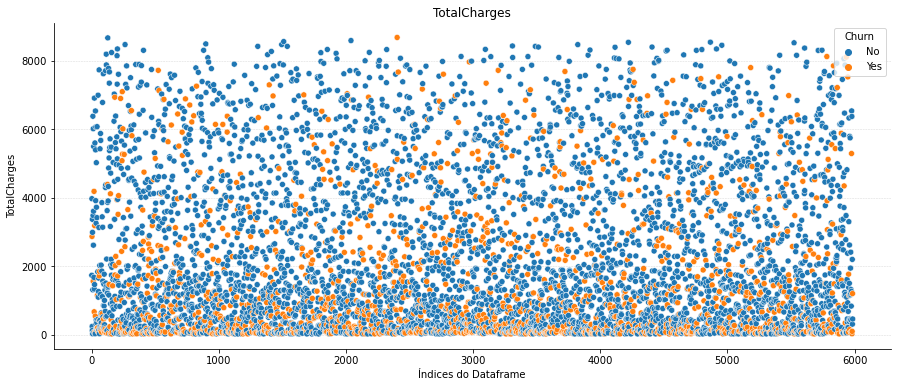

In [188]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df.index, y=df['TotalCharges'], data=df, hue='Churn').set_title('TotalCharges')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlabel('Índices do Dataframe')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.3)

<AxesSubplot:ylabel='TotalCharges'>

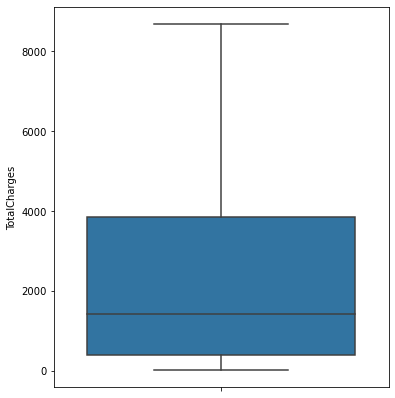

In [189]:
plt.figure(figsize=(6,7))
sns.boxplot(y=df['TotalCharges'], data=df)

Text(0.5, 0, 'Churn')

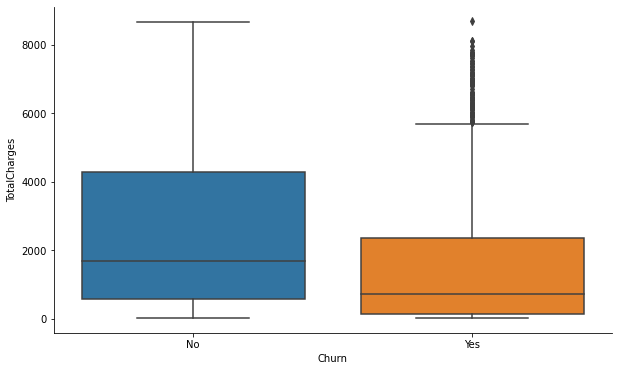

In [191]:
plt.figure(figsize=(10,6))
sns.boxplot(y='TotalCharges', x='Churn', data=df)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.ylabel('TotalCharges')
plt.xlabel('Churn')

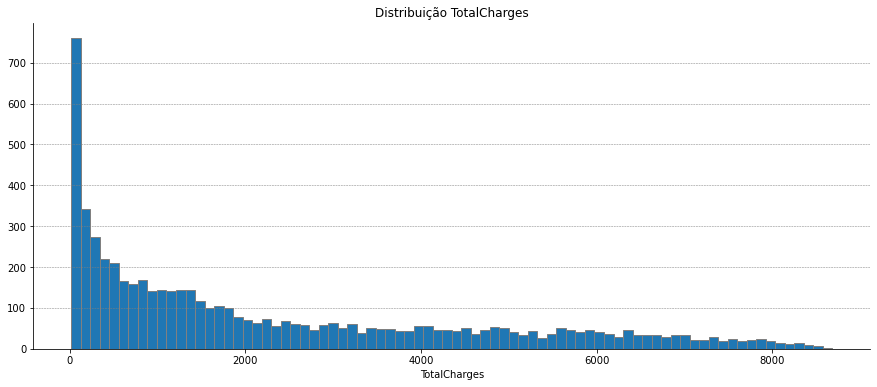

In [186]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.hist(x=df['TotalCharges'], bins=80, ec='grey')

ax.set(title = "Distribuição TotalCharges", xlabel = "TotalCharges")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

<AxesSubplot:title={'center':'Violin Plot do TotalCharges'}, xlabel='TotalCharges', ylabel='TotalCharges'>

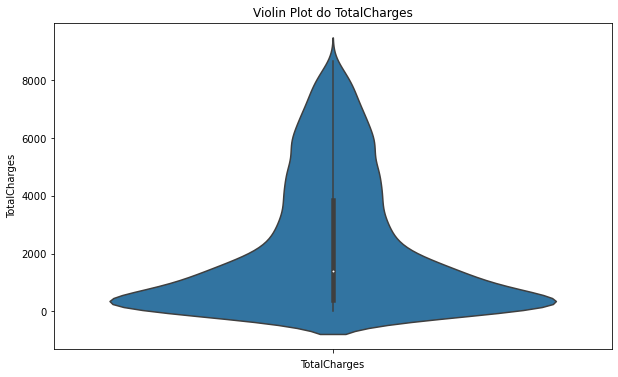

In [185]:
plt.figure(figsize=(10, 6))
plt.title('Violin Plot do TotalCharges')
plt.xlabel('TotalCharges')
sns.violinplot(y=df['TotalCharges'], data=df)

## Tratamento das Variáveis Categóricas

No primeiro momento, é necessário substituir os dados categóricos 'Yes' e 'No' por 1 e 0, respectivamente.

Além disso, quando atribuído 'No internet service' ou 'No phone service' (na coluna 'MultipleLines'), consideraremos como ausente, e, portanto, será substituído por 0.

In [11]:
df = df.replace('No', 0)
df = df.replace('Yes', 1)
df= df.replace('No phone service', 0)
df= df.replace('No internet service', 0)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,1,1,72,1,1,0,0,...,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0
1,9688-YGXVR,Female,0,0,0,44,1,0,Fiber optic,0,...,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.20,0
2,9286-DOJGF,Female,1,1,0,38,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,6994-KERXL,Male,0,0,0,4,1,0,DSL,0,...,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.50,0
4,2181-UAESM,Male,0,0,0,2,1,0,DSL,1,...,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.50,0


Em seguida, serão tratadas as outras colunas que possuem atributos categóricos também: 'gender', 'InternetService', 'Contract' e PaymentMethod'.

É preciso analisar se é melhor usar OneHot-Encoder ou Label Encoder. Caso o primeiro seja o escolhido, os dados irão ficar muito maiores, com a adição de muitas novas colunas. Caso o segundo seja o escolhido, o risco do modelo der peso maior para certos atributos pode ser contornado escalando os dados (com MinMax, ou StandarScale).

In [13]:
df['gender'].value_counts()

Male      3044
Female    2932
Name: gender, dtype: int64

In [14]:
#Criação de dummies indicando 1 para caso 'Male' e 0 para caso 'Female'.

gender = pd.get_dummies(df['gender'], drop_first=True)
df.drop('gender', axis=1, inplace=True)
df = pd.concat([gender, df], axis=1)

Remoção da coluna "customerID" também, pois ela não é relevante para o nosso modelo.

In [15]:
df.drop('customerID', axis=1, inplace=True)

In [20]:
df.head()

,Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,2,2,2,2,2,2,Two year,0,Credit card (automatic),24.10,1734.65,0
1,0,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.20,0
2,0,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,1,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.50,0
4,1,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.50,0


### Label Encoding

In [36]:
df['InternetService'].value_counts()

Fiber optic    2627
DSL            2064
0              1285
Name: InternetService, dtype: int64

In [16]:
df['InternetService'] = df['InternetService'].replace('Fiber optic', 1)
df['InternetService'] = df['InternetService'].replace('DSL', 2)

In [39]:
df['Contract'].value_counts()

Month-to-month    3269
Two year          1432
One year          1275
Name: Contract, dtype: int64

In [17]:
df['Contract'] = df['Contract'].replace('Two year', 24)
df['Contract'] = df['Contract'].replace('One year', 12)
df['Contract'] = df['Contract'].replace('Month-to-month', 1)

In [41]:
df['PaymentMethod'].value_counts()

Electronic check             2006
Mailed check                 1362
Bank transfer (automatic)    1306
Credit card (automatic)      1302
Name: PaymentMethod, dtype: int64

In [18]:
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 1)
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 2)
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 3)
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 4)

In [76]:
df.head()

,Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,24,0,4,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,1,1,0,1,0,1,1,4,88.15,3973.20,0
2,0,1,1,0,38,1,1,1,0,0,0,0,0,0,1,1,3,74.95,2869.85,1
3,1,0,0,0,4,1,0,2,0,0,0,0,0,1,1,1,1,55.90,238.50,0
4,1,0,0,0,2,1,0,2,1,0,1,0,0,0,1,0,1,53.45,119.50,0


In [19]:
df.shape

(5976, 20)

## Matriz de correlação

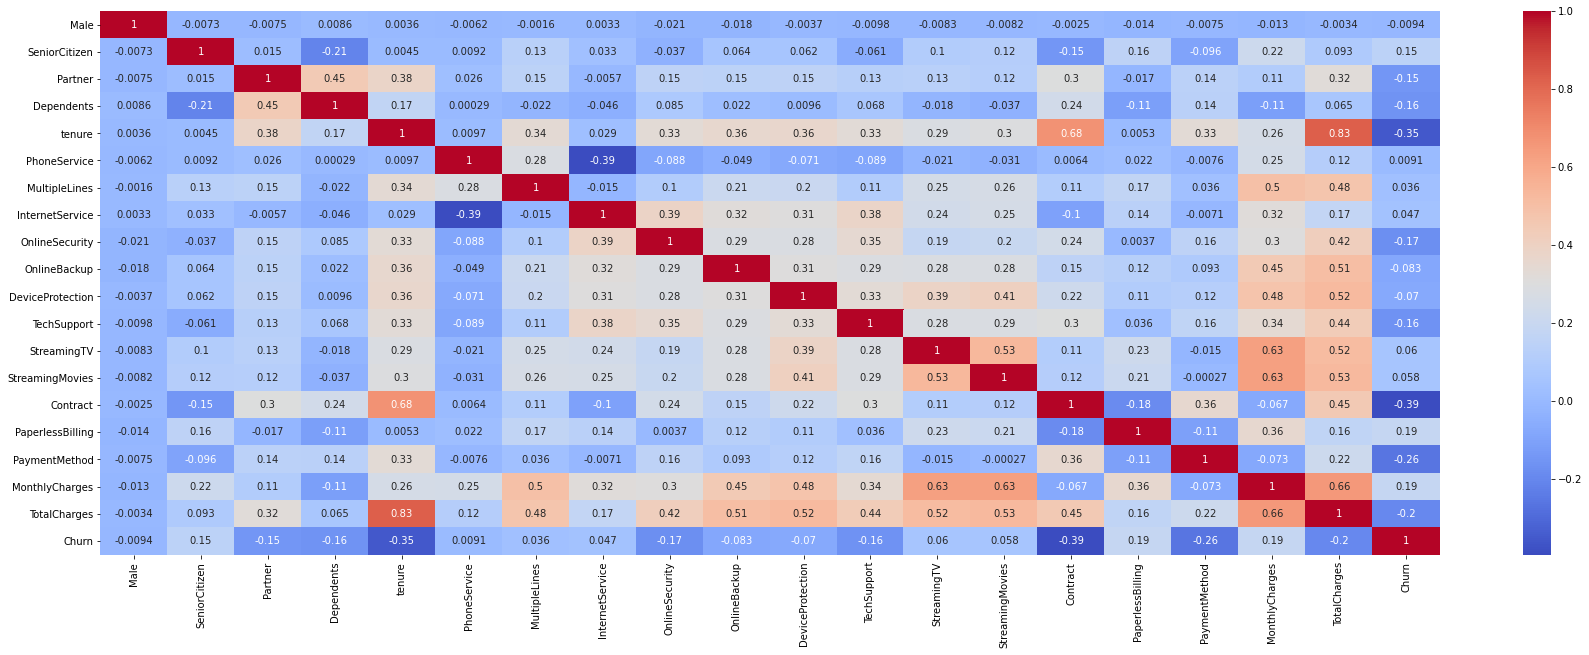

In [86]:
corr = df.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

## Pairplot

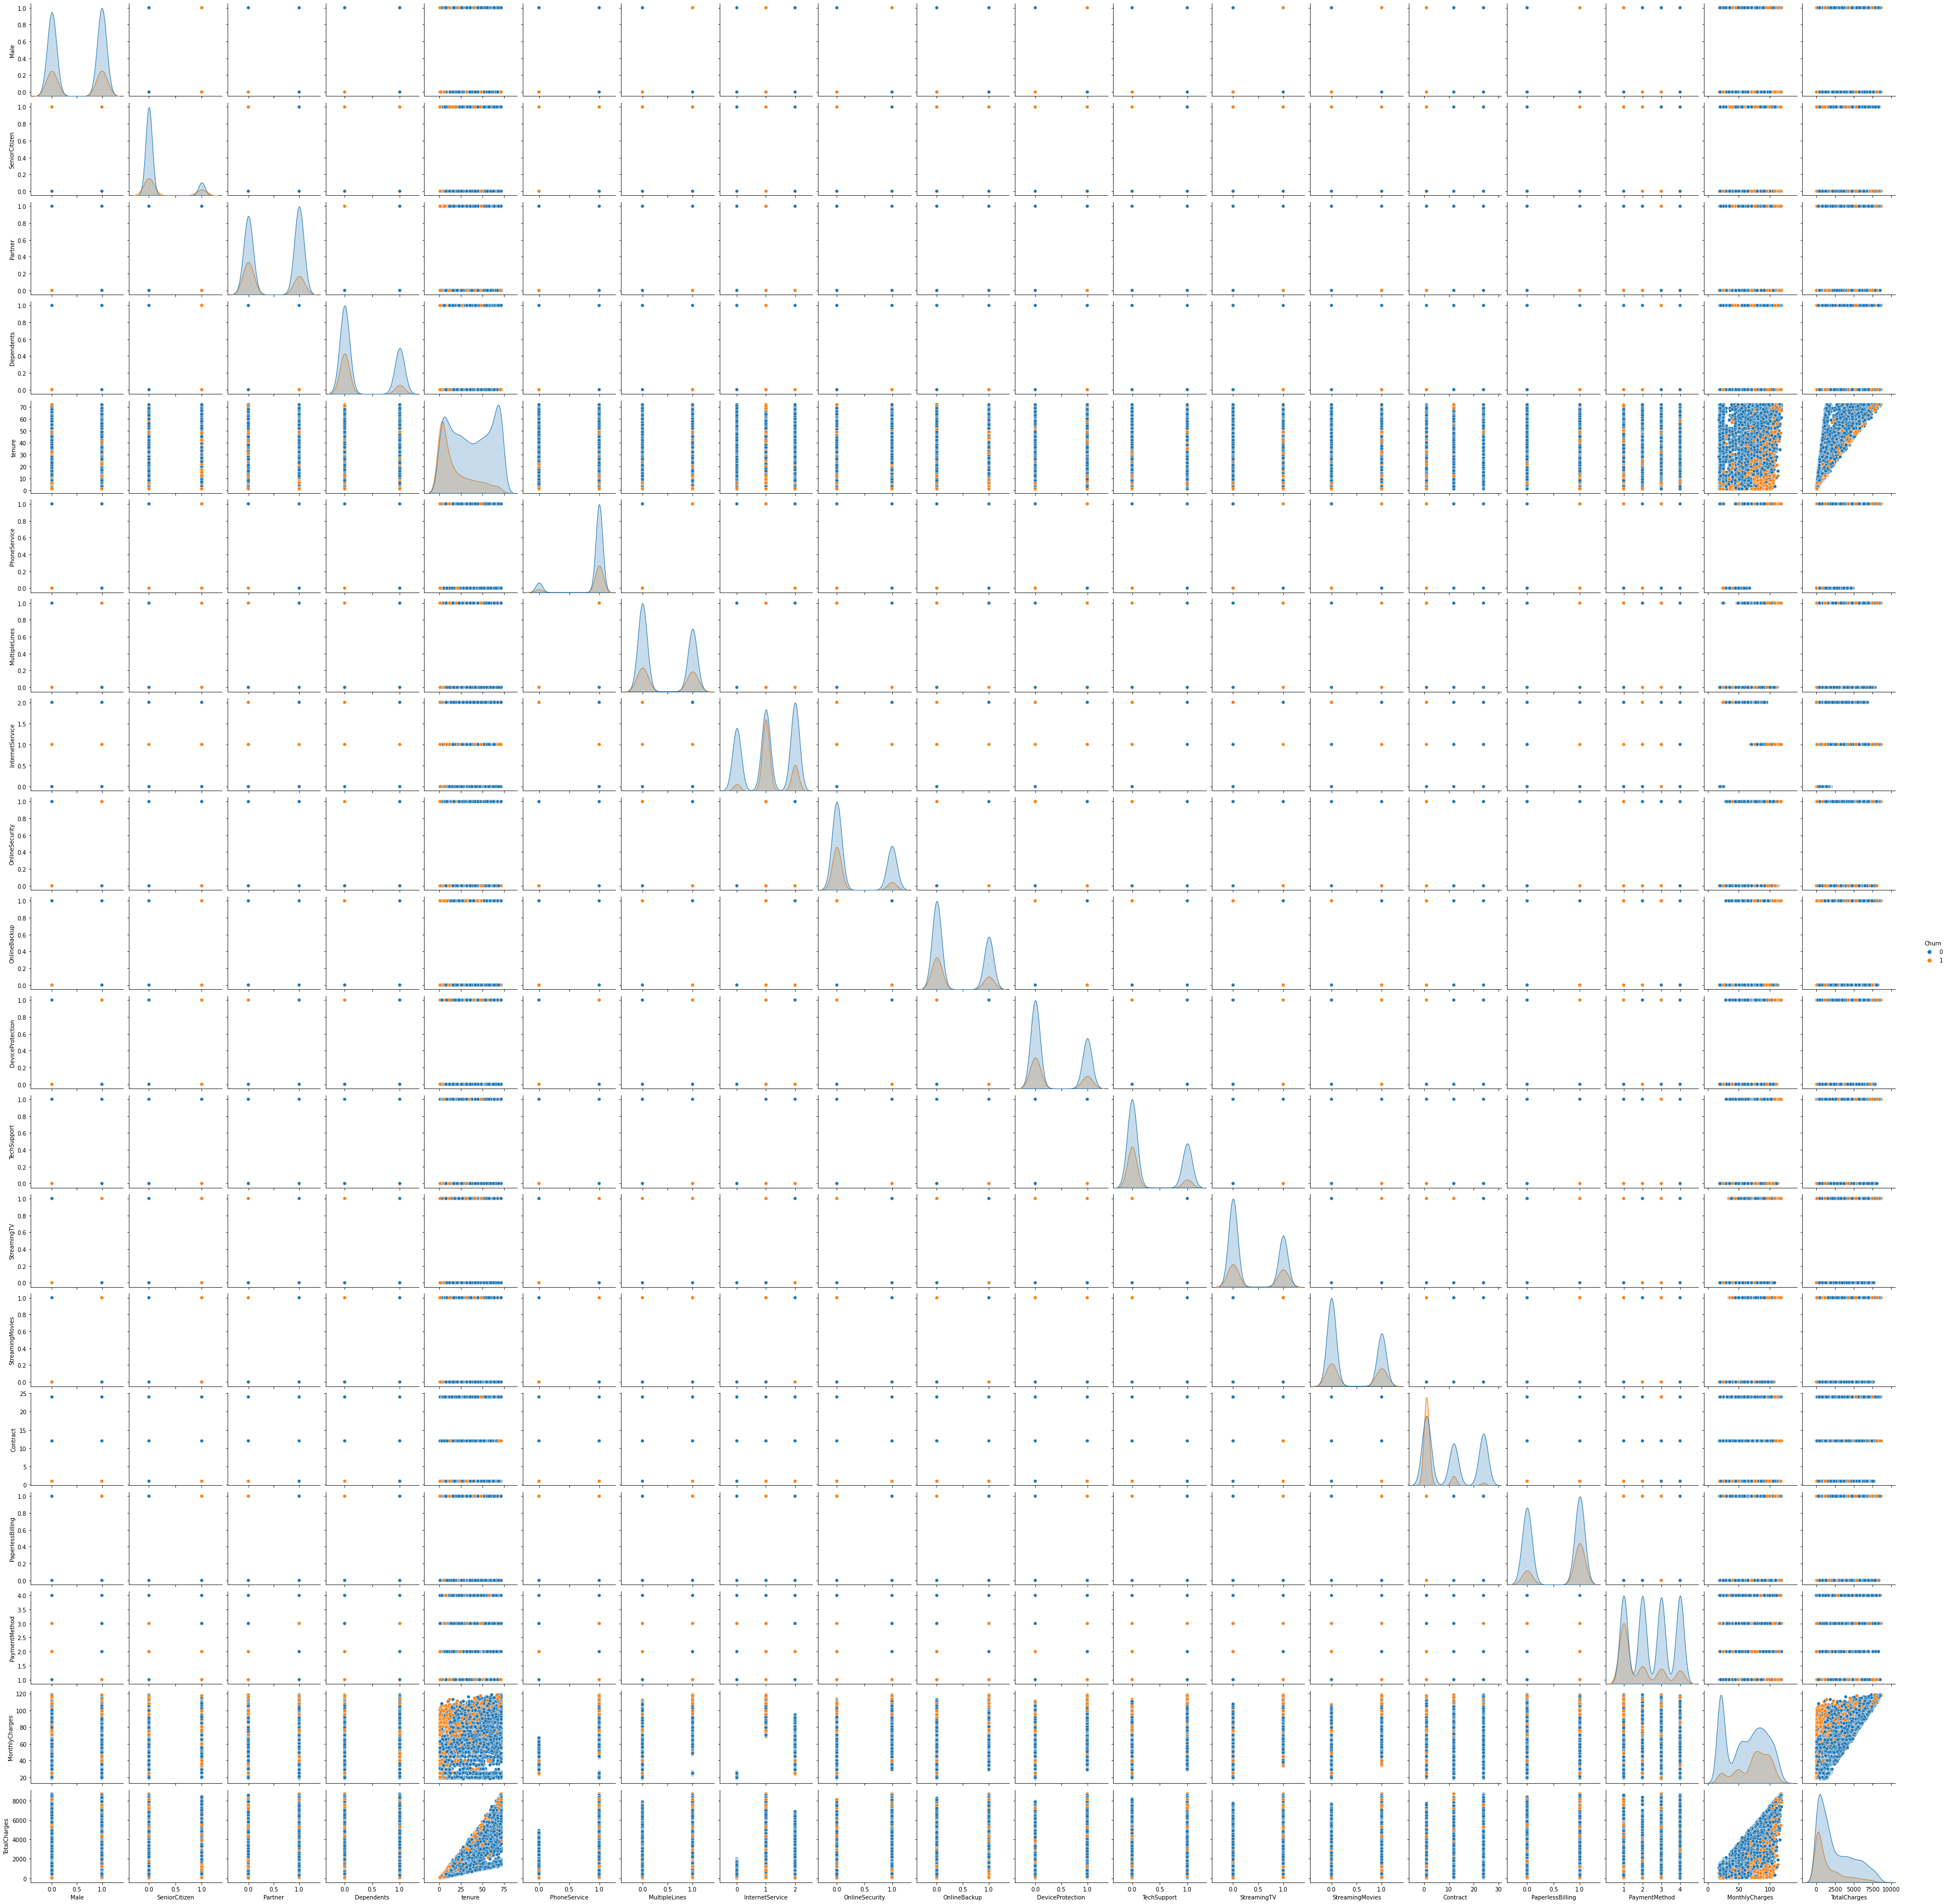

In [87]:
sns.pairplot(df, hue='Churn')

## Escalonamento dos Dados

Escalonamento com os dados Label Encoding.

In [20]:
df_x = df.drop('Churn', axis=1)

In [21]:
df_x.shape

(5976, 19)

### Standard Scaler

StandarScaler para dados Label Encoding.

In [22]:
scaler = StandardScaler()
scaler.fit(df_x)

df_scaler = scaler.transform(df_x)
df_scaler = pd.DataFrame(df_scaler, columns=df_x.columns)
df_scaler.tail()

,Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5971,0.981431,-0.439106,1.031279,-0.651577,-1.286719,0.33035,-0.861259,-0.176832,1.580121,-0.732558,-0.723143,-0.638831,1.262884,1.247410,-0.824563,0.833858,-1.145883,1.001603,-0.968831
5972,-1.018921,-0.439106,1.031279,1.534737,-0.388717,0.33035,1.161092,1.179712,1.580121,1.365079,1.382852,1.565358,1.262884,1.247410,1.588812,0.833858,1.461146,0.872057,-0.043871
5973,0.981431,-0.439106,1.031279,1.534737,-0.837718,0.33035,-0.861259,-1.533376,-0.632863,-0.732558,-0.723143,-0.638831,-0.791838,-0.801661,-0.824563,0.833858,-1.145883,-1.451473,-0.876018
5974,0.981431,2.277353,-0.969670,-0.651577,-0.837718,0.33035,1.161092,-0.176832,-0.632863,-0.732558,1.382852,-0.638831,1.262884,1.247410,-0.824563,0.833858,-1.145883,1.149419,-0.482824
5975,0.981431,-0.439106,-0.969670,-0.651577,-0.266262,0.33035,-0.861259,-1.533376,-0.632863,-0.732558,-0.723143,-0.638831,-0.791838,-0.801661,0.329660,-1.199245,1.461146,-1.496316,-0.809504


### Banco de Dados Final

Standard Scaler para os dados Label.

In [23]:
y = df['Churn'].reset_index(drop=True)
df_scaler_final = pd.concat([df_scaler, y], axis=1)
df_scaler_final.tail(10)

,Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5966,-1.018921,-0.439106,1.031279,1.534737,0.672560,0.330350,1.161092,-0.176832,-0.632863,1.365079,1.382852,1.565358,1.262884,1.247410,1.588812,0.833858,0.592136,1.431763,1.317160,1
5967,0.981431,2.277353,1.031279,-0.651577,1.284834,0.330350,1.161092,-0.176832,-0.632863,-0.732558,1.382852,1.565358,1.262884,1.247410,1.588812,-1.199245,-1.145883,1.237444,1.864779,0
5968,-1.018921,-0.439106,-0.969670,-0.651577,-1.245901,0.330350,-0.861259,1.179712,-0.632863,-0.732558,-0.723143,-0.638831,-0.791838,-0.801661,-0.824563,0.833858,-0.276873,-0.650943,-0.977978,0
5969,0.981431,-0.439106,1.031279,1.534737,1.611381,0.330350,1.161092,1.179712,1.580121,1.365079,1.382852,1.565358,1.262884,1.247410,1.588812,0.833858,-0.276873,0.815588,1.793581,0
5970,-1.018921,-0.439106,-0.969670,-0.651577,-1.286719,-3.027089,-0.861259,1.179712,-0.632863,-0.732558,-0.723143,-0.638831,-0.791838,-0.801661,-0.824563,0.833858,-0.276873,-1.320266,-0.999571,1
5971,0.981431,-0.439106,1.031279,-0.651577,-1.286719,0.330350,-0.861259,-0.176832,1.580121,-0.732558,-0.723143,-0.638831,1.262884,1.247410,-0.824563,0.833858,-1.145883,1.001603,-0.968831,1
5972,-1.018921,-0.439106,1.031279,1.534737,-0.388717,0.330350,1.161092,1.179712,1.580121,1.365079,1.382852,1.565358,1.262884,1.247410,1.588812,0.833858,1.461146,0.872057,-0.043871,0
5973,0.981431,-0.439106,1.031279,1.534737,-0.837718,0.330350,-0.861259,-1.533376,-0.632863,-0.732558,-0.723143,-0.638831,-0.791838,-0.801661,-0.824563,0.833858,-1.145883,-1.451473,-0.876018,0
5974,0.981431,2.277353,-0.969670,-0.651577,-0.837718,0.330350,1.161092,-0.176832,-0.632863,-0.732558,1.382852,-0.638831,1.262884,1.247410,-0.824563,0.833858,-1.145883,1.149419,-0.482824,1
5975,0.981431,-0.439106,-0.969670,-0.651577,-0.266262,0.330350,-0.861259,-1.533376,-0.632863,-0.732558,-0.723143,-0.638831,-0.791838,-0.801661,0.329660,-1.199245,1.461146,-1.496316,-0.809504,0


# Modelos de Machine Learning

## Oversampling SMOTE

* SMOTE (https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

-- SMOTE: método de oversampling que replica as observações com menor quantidade para se equalizar ao número de classificações de maior quantidade. A técnica de SMOTE encontra vizinhos próximos para as classes em minoria para cada amostra das classificações. Em seguida, traça uma reta entre o ponto original e o vizinho para definir a localização da observação genérica.

In [24]:
clientes_churn = df['Churn'].value_counts()
total = clientes_churn[0] + clientes_churn[1]
print('O número de clientes churn são: ', clientes_churn[1], f'({(clientes_churn[1]/total)*100:.1f}%)')
print('O número de clientes não churn são: ', clientes_churn[0], f'({(clientes_churn[0]/total)*100:.1f}%)')

O número de clientes churn são:  1587 (26.6%)
O número de clientes não churn são:  4389 (73.4%)


In [25]:
x = df_scaler_final.drop('Churn', axis=1)
y = df_scaler_final['Churn']

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [26]:
counter = Counter(y)
print(counter)
print('\n')
print(y.value_counts())

Counter({0: 4389, 1: 4389})


1    4389
0    4389
Name: Churn, dtype: int64


## Modelos para os dados Label encoding + Standard Scaler

In [27]:
classifier_list = [LogisticRegression(random_state=0), KNeighborsClassifier(), svm.SVC(random_state=0, probability=True), 
                   DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0),
                  GaussianNB(), XGBClassifier(random_state=0), SGDClassifier(random_state=0), LGBMClassifier(random_state=0), 
                  MLPClassifier(random_state=0)]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

for cls in classifier_list:
    print('Treinando', cls.__class__.__name__)
    cls.fit(x_train, y_train)
    train_score = cls.score(x_train, y_train)
    val_score = cross_val_score(cls, x_train, y_train, cv=5)
    test_score = cls.score(x_test, y_test)
    precision = metrics.precision_score(y_test, cls.predict(x_test))
    recall = metrics.recall_score(y_test, cls.predict(x_test))
    print('Score de acurácia de treino:', train_score)
    print('Score de acurácia de validação:', val_score)
    print('Score de acurácia de teste:', test_score)
    print('Score de precisão:', precision)
    print('Score de recall:', recall)
    print('-'*80)

Treinando LogisticRegression
Score de acurácia de treino: 0.7768442039305041
Score de acurácia de validação: [0.78220641 0.76156584 0.77849003 0.76282051 0.78774929]
Score de acurácia de teste: 0.7739179954441914
Score de precisão: 0.7537960954446855
Score de recall: 0.8034682080924855
--------------------------------------------------------------------------------
Treinando KNeighborsClassifier
Score de acurácia de treino: 0.8538877812589006
Score de acurácia de validação: [0.78220641 0.78291815 0.77777778 0.78418803 0.7962963 ]
Score de acurácia de teste: 0.7790432801822323
Score de precisão: 0.723943661971831
Score de recall: 0.8913294797687862
--------------------------------------------------------------------------------
Treinando SVC
Score de acurácia de treino: 0.8343776701794361
Score de acurácia de validação: [0.79359431 0.79786477 0.8005698  0.8048433  0.81766382]
Score de acurácia de teste: 0.8001138952164009
Score de precisão: 0.7830396475770925
Score de recall: 0.82196531

## Métricas de Avaliação dos Modelos

No problema dos churners, deseja-se otimizar o modelo para um indicador de recall mais alto do que o indicador de precisão: o custo de gastar recursos em um cliente que não era churner é barato, mas o custo de não atuar em um cliente que era churner e não foi identificado é alto, pois a empresa perderá o seu cliente.

### XGBClassifier

In [88]:
xgb = XGBClassifier(random_state=0)
xgb.fit(x_train, y_train)

[17:19:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       891
           1       0.83      0.84      0.83       865

    accuracy                           0.84      1756
   macro avg       0.84      0.84      0.84      1756
weighted avg       0.84      0.84      0.84      1756



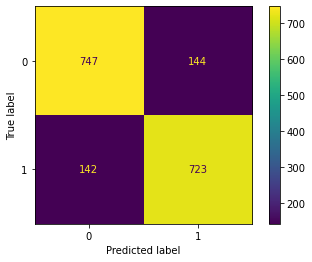

ROC AUC treino: 0.9917703906042629
ROC AUC teste: 0.9215319540945746


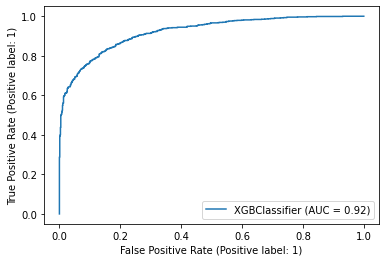

In [89]:
print(classification_report(y_test, xgb.predict(x_test)))

plot_confusion_matrix(xgb, x_test, y_test)  
plt.show() 

y_proba_train = xgb.predict_proba(x_train)
roc_train = roc_auc_score(y_train, y_proba_train[:,1])
y_proba_test = xgb.predict_proba(x_test)
roc_test = roc_auc_score(y_test, y_proba_test[:,1])
print('ROC AUC treino:', roc_train)
print('ROC AUC teste:', roc_test)

metrics.plot_roc_curve(xgb, x_test, y_test)

### LGBMClassifier

In [90]:
lgbm = LGBMClassifier(random_state=0)
lgbm.fit(x_train, y_train)

LGBMClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       891
           1       0.83      0.84      0.83       865

    accuracy                           0.84      1756
   macro avg       0.84      0.84      0.84      1756
weighted avg       0.84      0.84      0.84      1756



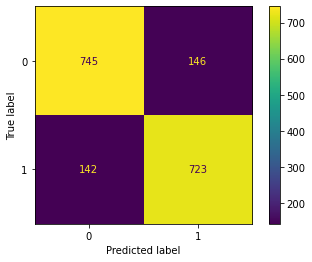

ROC AUC treino: 0.977047813603882
ROC AUC teste: 0.9282108172281583


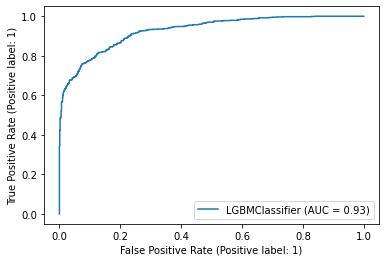

In [91]:
print(classification_report(y_test, lgbm.predict(x_test)))

plot_confusion_matrix(lgbm, x_test, y_test)  
plt.show() 

y_proba_train = lgbm.predict_proba(x_train)
roc_train = roc_auc_score(y_train, y_proba_train[:,1])
y_proba_test = lgbm.predict_proba(x_test)
roc_test = roc_auc_score(y_test, y_proba_test[:,1])
print('ROC AUC treino:', roc_train)
print('ROC AUC teste:', roc_test)

metrics.plot_roc_curve(lgbm, x_test, y_test)

### KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.85      0.67      0.75       891
           1       0.72      0.88      0.79       865

    accuracy                           0.77      1756
   macro avg       0.79      0.78      0.77      1756
weighted avg       0.79      0.77      0.77      1756



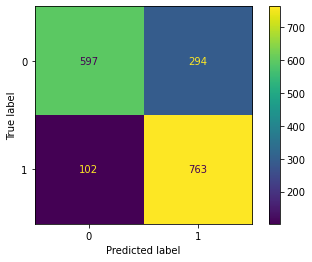

ROC AUC treino: 0.9461209064495424
ROC AUC teste: 0.8529813225381626


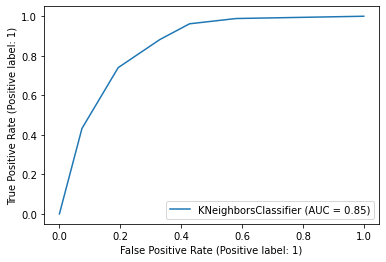

In [93]:
print(classification_report(y_test, knn.predict(x_test)))

plot_confusion_matrix(knn, x_test, y_test)  
plt.show() 

y_proba_train = knn.predict_proba(x_train)
roc_train = roc_auc_score(y_train, y_proba_train[:,1])
y_proba_test = knn.predict_proba(x_test)
roc_test = roc_auc_score(y_test, y_proba_test[:,1])
print('ROC AUC treino:', roc_train)
print('ROC AUC teste:', roc_test)

metrics.plot_roc_curve(knn, x_test, y_test)

### MLPClassifier

In [97]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train, y_train)

MLPClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       891
           1       0.79      0.83      0.81       865

    accuracy                           0.81      1756
   macro avg       0.81      0.81      0.81      1756
weighted avg       0.81      0.81      0.81      1756



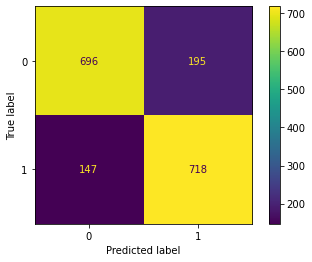

ROC AUC treino: 0.9508122121348407
ROC AUC teste: 0.8789027072264067


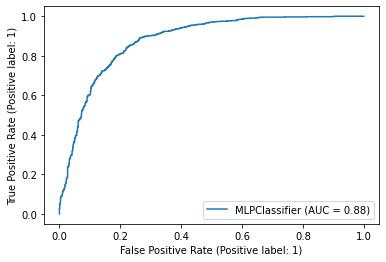

In [98]:
print(classification_report(y_test, mlp.predict(x_test)))

plot_confusion_matrix(mlp, x_test, y_test)  
plt.show() 

y_proba_train = mlp.predict_proba(x_train)
roc_train = roc_auc_score(y_train, y_proba_train[:,1])
y_proba_test = mlp.predict_proba(x_test)
roc_test = roc_auc_score(y_test, y_proba_test[:,1])
print('ROC AUC treino:', roc_train)
print('ROC AUC teste:', roc_test)

metrics.plot_roc_curve(mlp, x_test, y_test)

### RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       891
           1       0.83      0.85      0.84       865

    accuracy                           0.84      1756
   macro avg       0.84      0.84      0.84      1756
weighted avg       0.84      0.84      0.84      1756



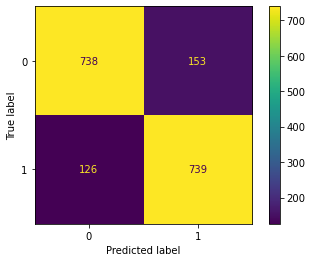

ROC AUC treino: 0.9999471888914632
ROC AUC teste: 0.9221112862731359


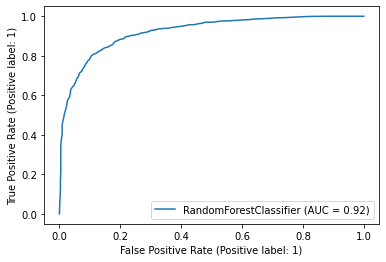

In [30]:
print(classification_report(y_test, rfc.predict(x_test)))

plot_confusion_matrix(rfc, x_test, y_test)  
plt.show() 

y_proba_train = rfc.predict_proba(x_train)
roc_train = roc_auc_score(y_train, y_proba_train[:,1])
y_proba_test = rfc.predict_proba(x_test)
roc_test = roc_auc_score(y_test, y_proba_test[:,1])
print('ROC AUC treino:', roc_train)
print('ROC AUC teste:', roc_test)

metrics.plot_roc_curve(rfc, x_test, y_test)

## Grid Search

In [35]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

grid_search = GridSearchCV(rfc, param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy', return_train_score=True)

In [37]:
grid_search.fit(x_train, y_train)

In [33]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [34]:
grid_search.best_score_

0.8345212494721252